# Проект: Линейные модели в машинном обучении: "Вольный луг"

## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!
Поэтому он просит нас модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
Средний удой за год — не менее 6000 килограммов,
Молоко должно быть вкусным.

### Описание данных

ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы

Сырой протеин — содержание сырого протеина в корме, в граммах

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы

Тип пастбища — ландшафт лугов, на которых паслась корова

id — номер коровы

Порода — порода коровы

Возраст — бинарный признак (менее_2_лет, более_2_лет)

Имя Папы — порода папы коровы

Жирность — содержание жиров в молоке, в процентах

Белок — содержание белков в молоке, в процентах

Вкус молока — оценка вкуса по личным критериям фермера

Удой — масса молока, которую корова даёт в год, в килограммах

ferma_dad.csv хранит имя папы каждой коровы в стаде фермера

cow_buy.csv — это данные о коровах «ЭкоФермы»

## Загрузка данных

In [1]:
!pip install phik

In [2]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
import math
import random
import phik
from phik import resources, report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, precision_score,precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

In [3]:
#Читаем файлы
df_ferma_m = pd.read_csv('/datasets/ferma_main.csv', sep=';',decimal=',',index_col=0)
df_ferma_d = pd.read_csv('/datasets/ferma_dad.csv', sep=';',decimal=',',index_col=0)
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')

In [4]:
#Выводим на экран первые 10 строк датафреймов
df_ferma_m.head(10)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет


In [5]:
#Выводим информацию а датафреймах
df_ferma_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1 to 627
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Удой, кг                               634 non-null    int64  
 1   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 2   Сырой протеин, г                       634 non-null    int64  
 3   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 4   Порода                                 634 non-null    object 
 5   Тип пастбища                           634 non-null    object 
 6   порода папы_быка                       634 non-null    object 
 7   Жирность,%                             634 non-null    float64
 8   Белок,%                                634 non-null    float64
 9   Вкус молока                            634 non-null    object 
 10  Возраст                                634 non-null    object 
dtypes: flo

In [6]:
#Выводим на экран первые 10 строк датафреймов
df_ferma_d.head(10)

,Имя Папы
id,
1,Буйный
2,Соловчик
3,Барин
4,Буйный
5,Барин
6,Барин
7,Соловчик
8,Геркулес
9,Буйный


In [7]:
#Выводим информацию а датафреймах
df_ferma_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 1 to 629
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Имя Папы  629 non-null    object
dtypes: object(1)
memory usage: 9.8+ KB


In [8]:
#Выводим на экран датафрейм
df_cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [9]:
#Выводим информацию а датафреймах
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [10]:
#Выводим пропуски в датафреймах
df_ferma_m.isna().sum()

Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [11]:
#Выводим пропуски в датафреймах
df_ferma_d.isna().sum()

Имя Папы    0
dtype: int64

In [12]:
#Выводим пропуски в датафреймах
df_cow_buy.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

In [13]:
#Выводим дубликаты в датафреймах
df_ferma_m.duplicated().sum()

5

In [14]:
#Выводим дубликаты в датафреймах
df_cow_buy.duplicated().sum()

4

In [15]:
#Выводим описательную статистику
df_ferma_m.describe()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [16]:
df_ferma_d.describe()

,Имя Папы
count,629
unique,4
top,Барин
freq,240


In [17]:
df_cow_buy.describe()

,"Текущая_жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


### Вывод

Сохранила данные в датафреймах

ferma_main.csv - df_ferma_m

ferma_dad.csv - df_ferma_d

cow_buy.csv - df_cow_buy

Изучила данные по дупликатам,пропускам,аномалиям.

Получила описательную статистику датафреймов

Данные не правильно оформлены по столбцам

Пропусков нету

Есть дупликаты в двух датафреймах df_ferma_m, df_cow_buy

##  Предобработка данных

In [18]:
#Меняем названия столбцов
df_ferma_m.rename(columns = {'ЭКЕ (Энергетическая кормовая единица)':'EFU','СПО (Сахаро-протеиновое соотношение)':'SPR'
                             ,'Удой, кг': 'm_yield_kg','Сырой протеин, г':'r_protein_g',
                             'Порода':'breed','Тип пастбища':'pasture_type',
                             'порода папы_быка':'papa_bull_breed',
                             'Жирность,%':'fat_content','Белок,%':'protein',
                             'Вкус молока':'milk_test','Возраст':'age'}, inplace=True)

In [19]:
df_ferma_m.head()

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [20]:
#Меняем названия столбцов
df_ferma_d.rename(columns={'Имя Папы':'dad_name'},inplace=True)

In [21]:
#Меняем названия столбцов
df_cow_buy.rename(columns={'Порода':'breed','Тип пастбища':'pasture_type',
                           'порода папы_быка':'papa_bull_breed','Имя_папы':'dad_name',
                           'Текущая_жирность,%':'current_fat_content',
                           'Текущий_уровень_белок,%':'current_level_protein','Возраст':'age'}, inplace=True)

In [22]:
df_cow_buy.head()

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [23]:
#Находим дупликаты в датафрейме
df_ferma_m[df_ferma_m.duplicated()]

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age
id,,,,,,,,,,,
627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [24]:
#Удаляем дупликаты
df_ferma_m = df_ferma_m.drop_duplicates()

In [25]:
df_ferma_m.shape

(629, 11)

In [26]:
#Находим дупликаты в датафрейме
df_cow_buy[df_cow_buy.duplicated()]

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [27]:
df_ferma_m.describe()

,m_yield_kg,EFU,r_protein_g,SPR,fat_content,protein
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


### Вывод

Поменяла название колонок

Поменяла тип данных в датафреймах df_ferma_m, df_cow_buy из object на float

Были дупликаты в датафреймах df_ferma_m, df_cow_buy. В первом случае удалила дупликаты. А датафрейм df_cow_buy считается тестовым, не целесообразно удалить дупликаты, может быть есть похожые характеристики коров.

## Исследовательский анализ данных

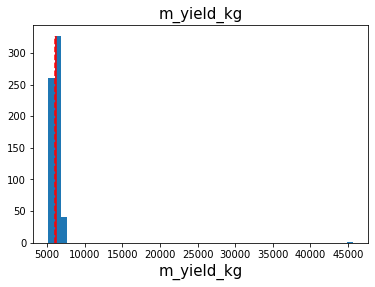

In [28]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['m_yield_kg'],bins=50)
plt.vlines(x=df_ferma_m['m_yield_kg'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['m_yield_kg'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('m_yield_kg', fontsize=15)
plt.xlabel('m_yield_kg',fontsize=15)
plt.show();

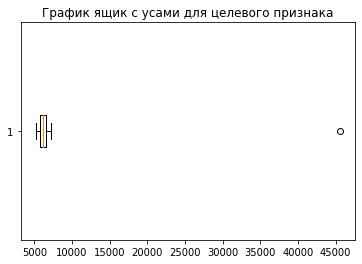

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: m_yield_kg, dtype: float64

In [29]:
#Получаем график ящик с усами 
plt.title('График ящик с усами для целевого признака')
plt.boxplot(df_ferma_m['m_yield_kg'], vert=False)
plt.show()
df_ferma_m['m_yield_kg'].describe()

По гистаграмме один пик, но ящик с усами показывает, что есть выброс данных.

In [30]:
#Находим выбросы
print(df_ferma_m.query('m_yield_kg==45616'))

    m_yield_kg   EFU  r_protein_g   SPR           breed pasture_type  \
id                                                                     
17       45616  11.5         1675  0.93  Вис Бик Айдиал    Холмистое   

   papa_bull_breed  fat_content  protein milk_test          age  
id                                                               
17         Айдиалл         3.22    3.076    вкусно  более_2_лет  


In [31]:
df_ferma_m = df_ferma_m[df_ferma_m.m_yield_kg < 40000]

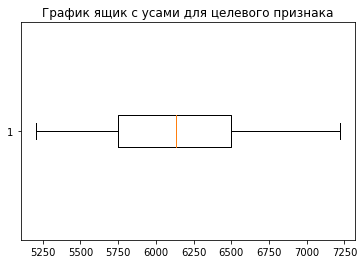

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: m_yield_kg, dtype: float64

In [32]:
#Получаем график ящик с усами 
plt.title('График ящик с усами для целевого признака')
plt.boxplot(df_ferma_m['m_yield_kg'], vert=False)
plt.show()
df_ferma_m['m_yield_kg'].describe()

Выбросов было не много, удалила, что бы данные были более точными

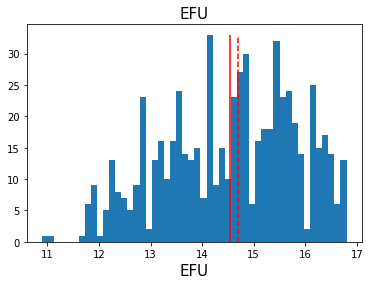

In [33]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['EFU'],bins=50)
plt.vlines(x=df_ferma_m['EFU'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['EFU'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('EFU', fontsize=15)
plt.xlabel('EFU',fontsize=15)
plt.show();

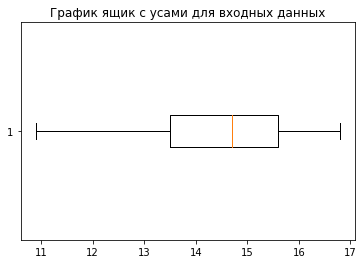

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: EFU, dtype: float64

In [34]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['EFU'], vert=False)
plt.show()
df_ferma_m['EFU'].describe()

По гистаграмме два пика.Ящик с усами показывает, что выброс в данных нет.

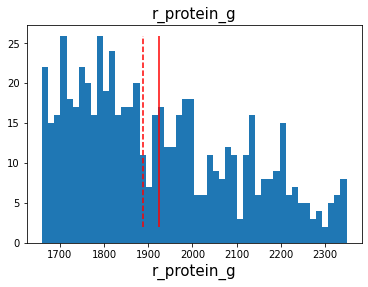

In [35]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['r_protein_g'],bins=50)
plt.vlines(x=df_ferma_m['r_protein_g'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['r_protein_g'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('r_protein_g', fontsize=15)
plt.xlabel('r_protein_g',fontsize=15)
plt.show();

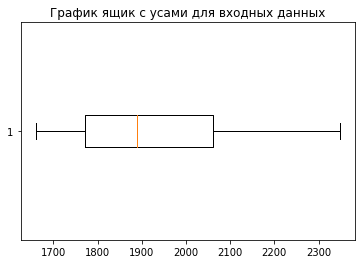

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: r_protein_g, dtype: float64

In [36]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['r_protein_g'], vert=False)
plt.show()
df_ferma_m['r_protein_g'].describe()

По гистаграмме один пик.Ящик с усами показывает, что выброс в данных нет.

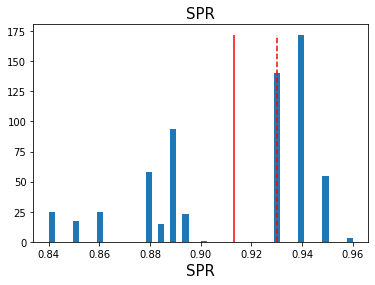

In [37]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['SPR'],bins=50)
plt.vlines(x=df_ferma_m['SPR'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['SPR'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('SPR', fontsize=15)
plt.xlabel('SPR',fontsize=15);

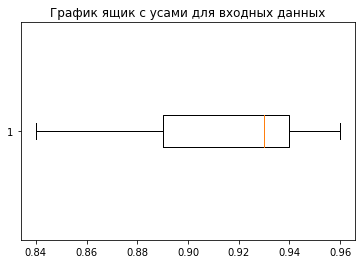

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: SPR, dtype: float64

In [38]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['SPR'], vert=False)
plt.show()
df_ferma_m['SPR'].describe()

По гистаграмме более двух пиков(«мультимодальной»).Ящик с усами показывает, что выброс в данных нет.

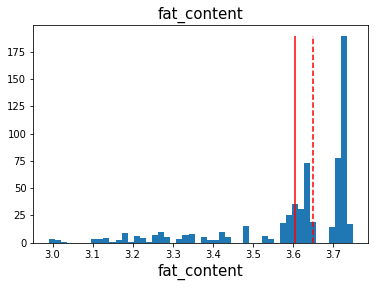

In [39]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['fat_content'],bins=50)
plt.vlines(x=df_ferma_m['fat_content'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['fat_content'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('fat_content', fontsize=15)
plt.xlabel('fat_content',fontsize=15);

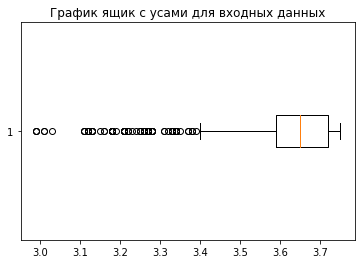

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

In [40]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['fat_content'], vert=False)
plt.show()
df_ferma_m['fat_content'].describe()

In [41]:
print(df_ferma_m.query('fat_content <= 3.10'))

     m_yield_kg   EFU  r_protein_g    SPR            breed pasture_type  \
id                                                                        
18         5777  12.4         1873  0.895   Вис Бик Айдиал    Холмистое   
555        5686  14.7         1712  0.860  РефлешнСоверинг    Холмистое   
559        5346  12.4         1837  0.860  РефлешнСоверинг    Холмистое   
562        5300  13.0         1785  0.860   Вис Бик Айдиал    Равнинное   
569        5989  13.2         1721  0.860   Вис Бик Айдиал    Холмистое   
577        5376  11.7         1825  0.860  РефлешнСоверинг    Равнинное   

    papa_bull_breed  fat_content  protein  milk_test          age  
id                                                                 
18          Айдиалл         3.03    3.080     вкусно  более_2_лет  
555          Айдиал         3.01    3.074     вкусно  более_2_лет  
559         Соверин         3.01    3.078  не вкусно  менее_2_лет  
562         Соверин         2.99    3.077  не вкусно  менее

In [42]:
df_ferma_m = df_ferma_m[df_ferma_m.fat_content > 3.03]

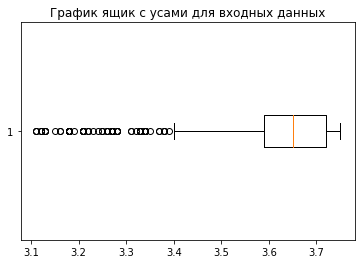

count    622.000000
mean       3.610064
std        0.158124
min        3.110000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

In [43]:
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['fat_content'], vert=False)
plt.show()
df_ferma_m['fat_content'].describe()

По гистаграмме два пика.Ящик с усами показывает, что в данных есть выбросы.Удалила выброс меньше 3.10.

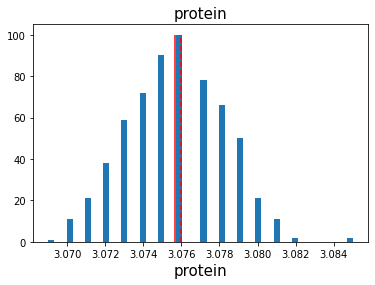

In [44]:
#Получаем графики по данным
bins = plt.hist(df_ferma_m['protein'],bins=50)
plt.vlines(x=df_ferma_m['protein'].mean(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=df_ferma_m['protein'].median(), colors='red'
           , ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('protein', fontsize=15)
plt.xlabel('protein',fontsize=15)
plt.show();

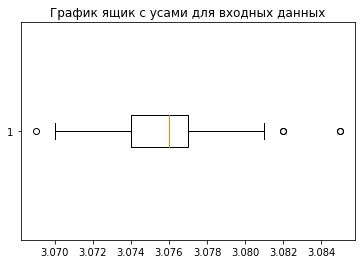

count    622.000000
mean       3.075659
std        0.002554
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

In [45]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['protein'], vert=False)
plt.show()
df_ferma_m['protein'].describe()

In [46]:
print(df_ferma_m.query('protein <= 3.069'))
print(df_ferma_m.query('protein >= 3.082'))

     m_yield_kg   EFU  r_protein_g   SPR           breed pasture_type  \
id                                                                      
241        5568  13.4         1733  0.88  Вис Бик Айдиал    Равнинное   

    papa_bull_breed  fat_content  protein  milk_test          age  
id                                                                 
241         Соверин         3.63    3.069  не вкусно  менее_2_лет  
     m_yield_kg   EFU  r_protein_g    SPR            breed pasture_type  \
id                                                                        
78         5871  14.7         1795  0.895   Вис Бик Айдиал    Равнинные   
427        6701  15.7         2068  0.940  РефлешнСоверинг    Холмистое   
472        5883  14.9         2159  0.890   Вис Бик Айдиал    Равнинное   
518        5819  13.7         1968  0.840   Вис Бик Айдиал    Холмистое   

    papa_bull_breed  fat_content  protein milk_test          age  
id                                                        

In [47]:
df_ferma_m = df_ferma_m[(df_ferma_m.protein > 3.069) & (df_ferma_m.protein < 3.082) ]

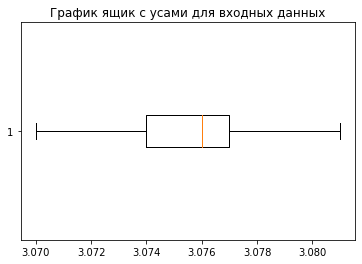

count    617.000000
mean       3.075619
std        0.002468
min        3.070000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.081000
Name: protein, dtype: float64

In [48]:
#Получаем график ящик с усами
plt.title('График ящик с усами для входных данных')
plt.boxplot(df_ferma_m['protein'], vert=False)
plt.show()
df_ferma_m['protein'].describe()

Тут распределение нормальное, есть выбросы.Выбросов не много, по этому удалила эти выбросы, что бы не было искажение данных.

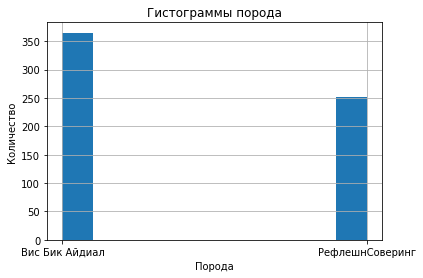

In [49]:
#Получаем графики по данным
df_ferma_m['breed'].hist(bins=10)
plt.xlabel('Порода')
plt.ylabel('Количество')
plt.title('Гистограммы порода')
plt.show();

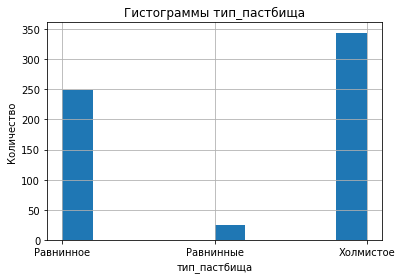

In [50]:
#Получаем графики по данным
df_ferma_m['pasture_type'].hist()
plt.xlabel('тип_пастбища')
plt.ylabel('Количество')
plt.title('Гистограммы тип_пастбища')
plt.show();

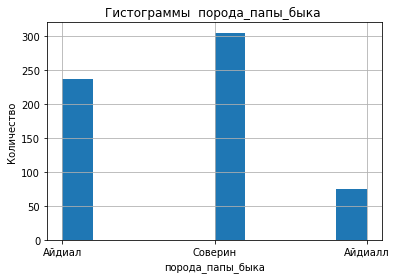

In [51]:
#Получаем графики по данным
df_ferma_m['papa_bull_breed'].hist()
plt.xlabel('порода_папы_быка')
plt.ylabel('Количество')
plt.title('Гистограммы  порода_папы_быка ')
plt.show();

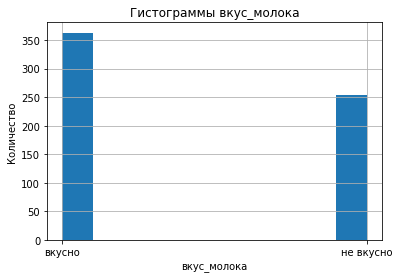

In [52]:
#Получаем графики по данным
df_ferma_m['milk_test'].hist()
plt.xlabel('вкус_молока')
plt.ylabel('Количество')
plt.title('Гистограммы вкус_молока')
plt.show();

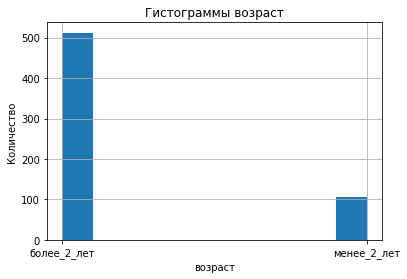

In [53]:
#Получаем графики по данным
df_ferma_m['age'].hist()
plt.xlabel('возраст')
plt.ylabel('Количество')
plt.title('Гистограммы возраст')
plt.show();

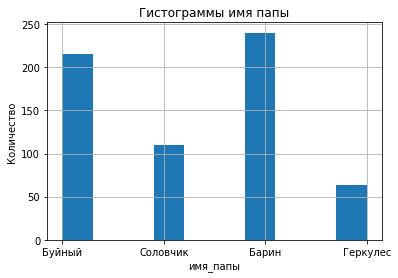

In [54]:
df_ferma_d['dad_name'].hist()
plt.xlabel('имя_папы')
plt.ylabel('Количество')
plt.title('Гистограммы имя папы')
plt.show();

### Вывод

В целевом признаке "удой" по гистограмме один пик, есть выбросы. Так же во входных данных "жирность, СПО, ЭКЕ" есть несколько пиков. Так же есть выбросы  в данных "белок,жирность". 
У фермера в основном коровы породы Вис Бик Айдиал,по возрасту более 2х лет, дают вкусное молоко, порода папы в большинстве случаев Соверин, в основно пасутся в холмистых пастбищах.

По поводу выбросов. Думаю можно пока их не трогать. Во время МО можно выбрать метрику каторая более устойчива к выбросам.

## Корреляционный анализ

Шкала Чеддока

Слабая - 0.1–0.30.1–0.3  обратная (−0.1)–(−0.3)(−0.1)–(−0.3)

Умеренная - 0.3–0.50.3–0.5 обратная (−0.3)–(−0.5)(−0.3)–(−0.5)

Заметная - 0.5–0.70.5–0.7 обратная (−0.5)–(−0.7)(−0.5)–(−0.7)

Высокая - 0.7–0.90.7–0.9 обратная (−0.7)–(−0.9)(−0.7)–(−0.9)

Весьма высокая - 0.9–10.9–1 обратная (−0.9)–(−1)(−0.9)–(−1)

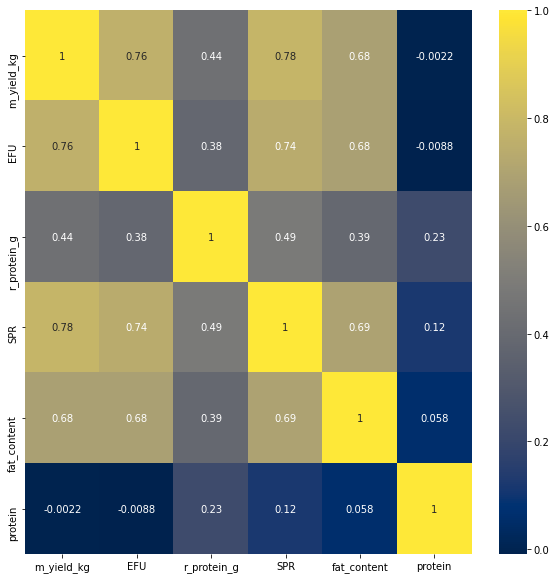

In [55]:
#Получаем кор.график по прзнакам
plt.figure(figsize=(10,10))
sns.heatmap(df_ferma_m.corr(method='spearman'),  annot=True, cmap='cividis');

In [56]:
df_ferma_m.corr(method='spearman', min_periods=1)

,m_yield_kg,EFU,r_protein_g,SPR,fat_content,protein
m_yield_kg,1.000000,0.762339,0.435553,0.783469,0.682574,-0.002220
EFU,0.762339,1.000000,0.382943,0.739847,0.682415,-0.008826
r_protein_g,0.435553,0.382943,1.000000,0.485479,0.390673,0.225871
SPR,0.783469,0.739847,0.485479,1.000000,0.693976,0.119844
fat_content,0.682574,0.682415,0.390673,0.693976,1.000000,0.058308
protein,-0.002220,-0.008826,0.225871,0.119844,0.058308,1.000000


По коэфицнентам корреляции видно, что есть  заметная связь между удойом и жирностью, высокая связь между удойом и SPR(отношение сахара к протеину в корме коровы),умеренная связь между удойом и сырым протеином,высокая связь между удойом и EFU(Энергетическая кормовая единица).

Есть  заметная мультиколлинеарность между EFU и fat_content и высокая мультиколлинеарность между EFU и SPR.

Далее по отдельности посмотрим зависимость между целевым признаком и входными данными.

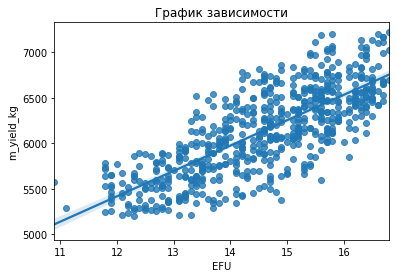

SpearmanrResult(correlation=0.7623391593690271, pvalue=2.5360710748972824e-118)

In [57]:
#Получаем кор.график по прзнакам
sns.regplot(x="EFU", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['EFU'], df_ferma_m['m_yield_kg'])

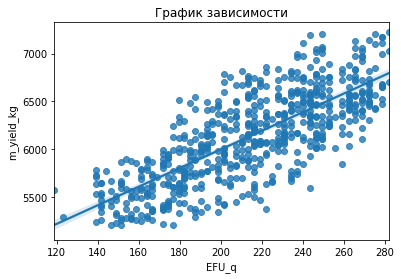

SpearmanrResult(correlation=0.7623391593690271, pvalue=2.5360710748972824e-118)

In [58]:
df_ferma_m['EFU_q'] = df_ferma_m['EFU']**2
sns.regplot(x="EFU_q", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['EFU_q'], df_ferma_m['m_yield_kg'])

Есть линейная зависимость межу признаками.

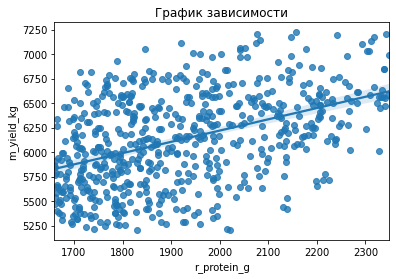

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [59]:
#Получаем кор.график по прзнакам
sns.regplot(x="r_protein_g", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['r_protein_g'], df_ferma_m['r_protein_g'])

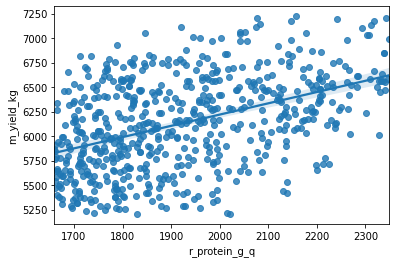

SpearmanrResult(correlation=0.43555293462062983, pvalue=5.9275624533268846e-30)

In [60]:
#Возведём в квадрат и получим график
df_ferma_m['r_protein_g_q'] = df_ferma_m['r_protein_g'] 
sns.regplot(x="r_protein_g_q", y="m_yield_kg", data=df_ferma_m)
plt.show()
stats.spearmanr(df_ferma_m['r_protein_g_q'], df_ferma_m['m_yield_kg'])

Нет линейной зависимости межу признаками.

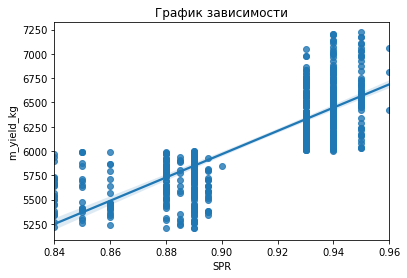

SpearmanrResult(correlation=0.7834692774778504, pvalue=3.54240500890964e-129)

In [61]:
#Получаем кор.график по прзнакам
sns.regplot(x="SPR", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['SPR'], df_ferma_m['m_yield_kg'])

Тут нет линейной зависимости.

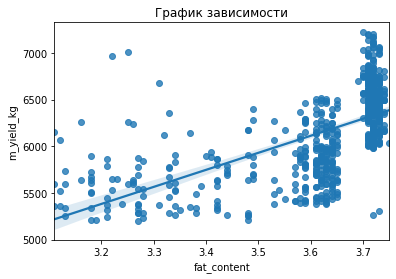

SpearmanrResult(correlation=0.7834692774778504, pvalue=3.54240500890964e-129)

In [62]:
#Получаем кор.график по прзнакам
sns.regplot(x="fat_content", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['SPR'], df_ferma_m['m_yield_kg'])

Нет линейной зависимости.

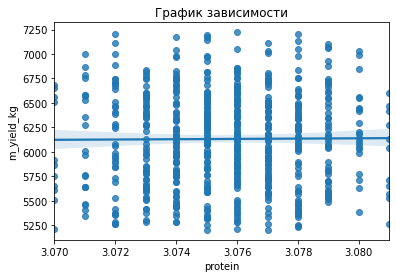

SpearmanrResult(correlation=-0.0022203210975016625, pvalue=0.9561067066139182)

In [63]:
#Получаем кор.график по прзнакам
sns.regplot(x="protein", y="m_yield_kg", data=df_ferma_m)
plt.title('График зависимости')
plt.show()
stats.spearmanr(df_ferma_m['protein'], df_ferma_m['m_yield_kg'])


Нет линейной связи. 

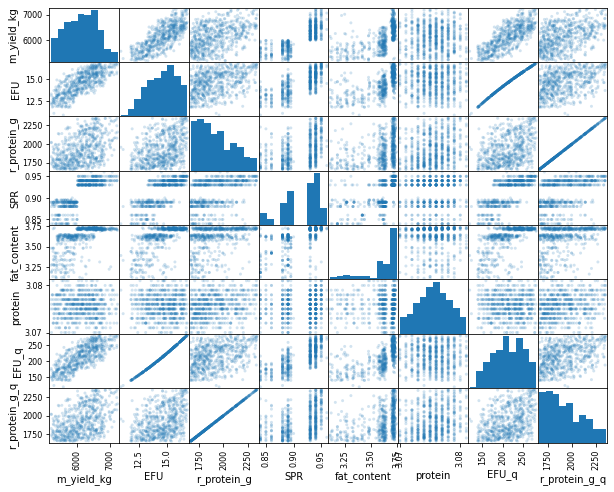

In [64]:
pd.plotting.scatter_matrix(df_ferma_m,figsize=(10, 8), diagonal = 'hist', alpha=0.2);
#plt.title('График зависимости');

### Вывод

По кореляции у целевого признака есть линейная зависимость с ЭКЕ (Энергетическая кормовая единица), с сырым протеином, с СПО (Сахаро-протеиновое соотношение).С жирностю линейной зависимости нет. Так же нет зависимости между целевым признаком и протеином.

Так же есть зависимость между входными признаками 

fat_content - EFU

EFU - SPR

SPR - fat_content


С котегориальными данными посчитаем коэфицент Фk.

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221


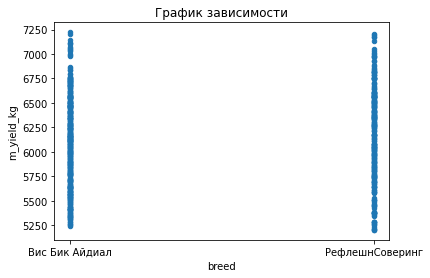

In [65]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='breed',y='m_yield_kg')
plt.title('График зависимости')
df_ferma_m.phik_matrix(verbose=False)

По коефиценту Фика есть слабая зависимость.

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221


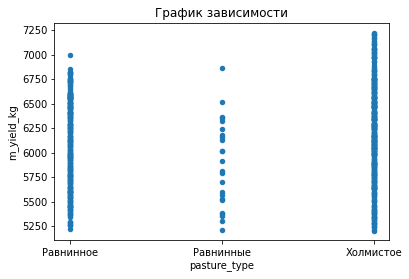

In [66]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='pasture_type',y='m_yield_kg')
plt.title('График зависимости')
df_ferma_m.phik_matrix(verbose=False)

По коефиценту Фk есть слабая зависимость.

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221


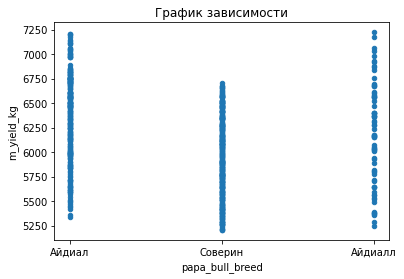

In [67]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='papa_bull_breed',y='m_yield_kg')
plt.title('График зависимости')
df_ferma_m.phik_matrix(verbose=False)

По коефиценту Фk есть умеренная зависимость.

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221


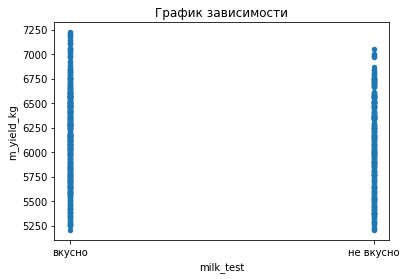

In [68]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='milk_test',y='m_yield_kg')
plt.title('График зависимости')
df_ferma_m.phik_matrix(verbose=False)

По коефиценту Фk есть слабая зависимость.

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221


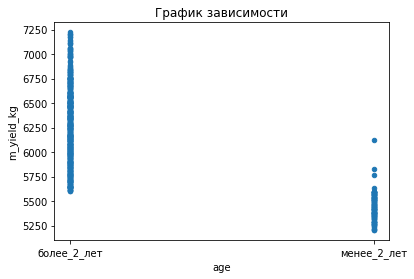

In [69]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='age',y='m_yield_kg')
plt.title('График зависимости')
df_ferma_m.phik_matrix(verbose=False)

### Вывод

По коэфиценту Фk есть сильная зависимость между возростом коровы и удоймо, в остальных случаях зависимость не сильная.

Есть зависимость между входными признаками 

age - EFU,SPR,fat_content

milk_test - SPR

papa_bul_breed - pasture_type

Что бы посмотреть связь между коровами и целевым признаком, соединяю два датасета(df_ferma_m и df_ferma_d)

In [70]:
df_ferma_m = df_ferma_m.merge(df_ferma_d[['dad_name']], left_index=True, right_index=True)
df_ferma_m.phik_matrix(verbose=False)

,m_yield_kg,EFU,r_protein_g,SPR,breed,pasture_type,papa_bull_breed,fat_content,protein,milk_test,age,EFU_q,r_protein_g_q,dad_name
m_yield_kg,1.000000,0.718274,0.465695,0.661389,0.157935,0.274539,0.441142,0.704656,0.228827,0.162561,0.998467,0.720066,0.465695,0.435059
EFU,0.718274,1.000000,0.450278,0.589310,0.127969,0.104460,0.120950,0.722649,0.000000,0.274166,0.767431,0.979972,0.450278,0.079201
r_protein_g,0.465695,0.450278,1.000000,0.384237,0.083713,0.061244,0.000000,0.425181,0.213948,0.165221,0.346741,0.447495,1.000000,0.125249
SPR,0.661389,0.589310,0.384237,1.000000,0.100395,0.227196,0.444432,0.623847,0.000000,0.573005,0.738159,0.585143,0.384237,0.414664
breed,0.157935,0.127969,0.083713,0.100395,1.000000,0.081643,0.040180,0.286074,0.378310,0.000000,0.061209,0.065155,0.083713,0.377666
pasture_type,0.274539,0.104460,0.061244,0.227196,0.081643,1.000000,0.589325,0.152697,0.132439,0.101383,0.070124,0.147479,0.061244,0.120991
papa_bull_breed,0.441142,0.120950,0.000000,0.444432,0.040180,0.589325,1.000000,0.328583,0.025102,0.000000,0.143566,0.078465,0.000000,0.639447
fat_content,0.704656,0.722649,0.425181,0.623847,0.286074,0.152697,0.328583,1.000000,0.000000,0.203021,0.678349,0.716603,0.425181,0.000000
protein,0.228827,0.000000,0.213948,0.000000,0.378310,0.132439,0.025102,0.000000,1.000000,0.105665,0.000000,0.000000,0.213948,0.076948
milk_test,0.162561,0.274166,0.165221,0.573005,0.000000,0.101383,0.000000,0.203021,0.105665,1.000000,0.141381,0.305613,0.165221,0.000000


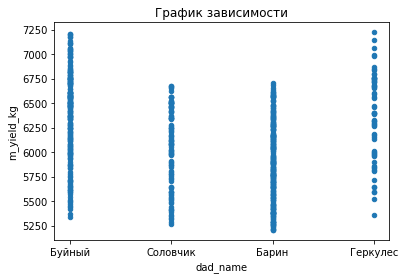

In [71]:
#Получаем кор.график по прзнакам
df_ferma_m.plot(kind='scatter', x='dad_name',y='m_yield_kg');
plt.title('График зависимости');

По коефиценту Фk есть умеренная зависимость.

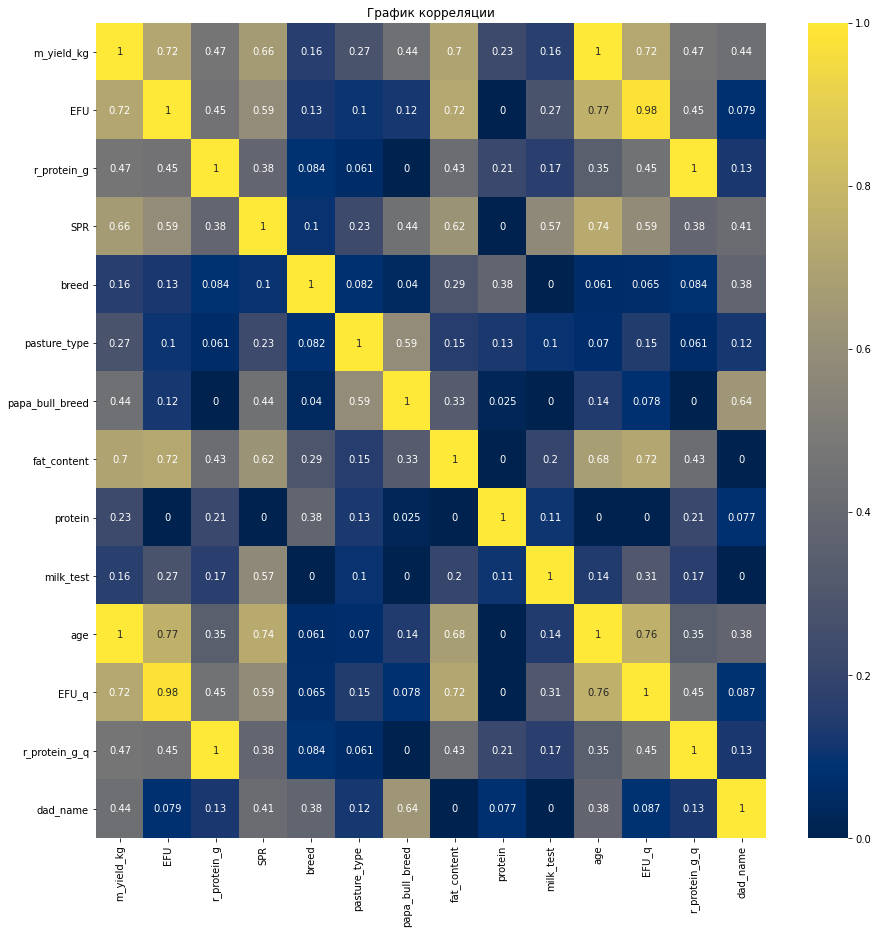

In [72]:
#Получаем кор.график по прзнакам
plt.figure(figsize=(15, 15))
sns.heatmap(df_ferma_m.phik_matrix(verbose=False), annot=True, cmap='cividis')
plt.title('График корреляции');

###  Вывод


Есть входные признаки,между которыми есть взаимосвязь.
Во время выбора модели обучения получу входные данные отдельно категориальные данные и количественные. До МО обучения воспльзуюсь методом маштабирования и кодирование.

Для количественной выборки входнными признаками будут 'EFU,r_protein_g'

Для категориальных выборки входнными признаками будут 'dad_name,age,papa_bull_breed,pasture_type,SPR,breed,fat_content'


## Обучение модели линейной регрессии

In [73]:
#Создаём датафрейм для входных признаков
df_ferma_first = df_ferma_m[['m_yield_kg','EFU','r_protein_g','SPR','pasture_type','papa_bull_breed','age','breed']].copy()
df_ferma_first

,m_yield_kg,EFU,r_protein_g,SPR,pasture_type,papa_bull_breed,age,breed
id,,,,,,,,
1,5863,14.2,1743,0.890,Равнинное,Айдиал,более_2_лет,Вис Бик Айдиал
2,5529,12.8,2138,0.890,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал
3,5810,14.0,1854,0.885,Холмистое,Соверин,более_2_лет,РефлешнСоверинг
4,5895,12.4,2012,0.885,Холмистое,Айдиал,более_2_лет,РефлешнСоверинг
5,5302,12.8,1675,0.885,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал
...,...,...,...,...,...,...,...,...
625,6812,15.4,1964,0.940,Равнинное,Айдиал,более_2_лет,РефлешнСоверинг
626,5513,12.9,1700,0.880,Равнинное,Соверин,менее_2_лет,РефлешнСоверинг
627,5970,14.4,1837,0.880,Холмистое,Соверин,более_2_лет,РефлешнСоверинг


In [74]:
#Cохранение выбороки для МО
X = df_ferma_first.drop('m_yield_kg',axis=1)
y = df_ferma_first['m_yield_kg']
print(X.head())
print()
print(y.head())

     EFU  r_protein_g    SPR pasture_type papa_bull_breed          age  \
id                                                                       
1   14.2         1743  0.890    Равнинное          Айдиал  более_2_лет   
2   12.8         2138  0.890    Равнинные         Соверин  менее_2_лет   
3   14.0         1854  0.885    Холмистое         Соверин  более_2_лет   
4   12.4         2012  0.885    Холмистое          Айдиал  более_2_лет   
5   12.8         1675  0.885    Равнинные         Соверин  менее_2_лет   

              breed  
id                   
1    Вис Бик Айдиал  
2    Вис Бик Айдиал  
3   РефлешнСоверинг  
4   РефлешнСоверинг  
5    Вис Бик Айдиал  

id
1    5863
2    5529
3    5810
4    5895
5    5302
Name: m_yield_kg, dtype: int64


In [75]:
#создаём константы RANDOM_STATE
RANDOM_STATE = 42
#Разбиваем на тренировочную итестовую выборку
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(493, 7)
(124, 7)
(493,)
(124,)


In [76]:
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(drop='first')

cat_col = ['breed', 'pasture_type', 'papa_bull_breed','age']
#Кодируем категориальные признаки тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col]).toarray()
X_test_ohe = encoder.transform(X_test[cat_col]).toarray()


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names(cat_col)
#создаём датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


In [77]:
#Маштабируем количественные признаки
scaler = StandardScaler()

df_num = ['EFU','r_protein_g']
# обучаем скейлер на количественных признаках 
scaler.fit(X_train[df_num])
# масштабируем тренировочную выборку
X_scaler =  scaler.transform(X_train[df_num])
X_test_scaler= scaler.transform(X_test[df_num])
X_scaled = pd.DataFrame(X_scaler, columns=df_num)
X_test_scaled = pd.DataFrame(X_test_scaler, columns=df_num)

print(X_scaled)

          EFU  r_protein_g
0    0.575822     0.274382
1   -0.790447     0.339607
2   -1.094062    -1.106206
3    0.499918     1.616923
4    1.410764    -0.285463
..        ...          ...
488 -1.245870    -0.649634
489 -0.486832    -0.627892
490  0.879438     1.616923
491  0.424015    -0.019129
492  0.727630     0.187416

[493 rows x 2 columns]


In [78]:
X_train = pd.concat([X_train_ohe, X_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


In [79]:
#Создайте модель линейной регрессии
#инициализация модели
model_lr  = LinearRegression()
#обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)
#вывод рассчитанных коэффициентов
print(model_lr.coef_,model_lr.intercept_ )


#Получаем предсказания
predictions = model_lr.predict(X_test)
r2_lr = r2_score(y_test,predictions)
print(r2_lr)

[   3.24725073  -41.31032263   51.22957729 -156.97774054 -318.12884941
 -294.81077304  258.78200945   71.51764773] 6327.24336117046
0.7540178346766759


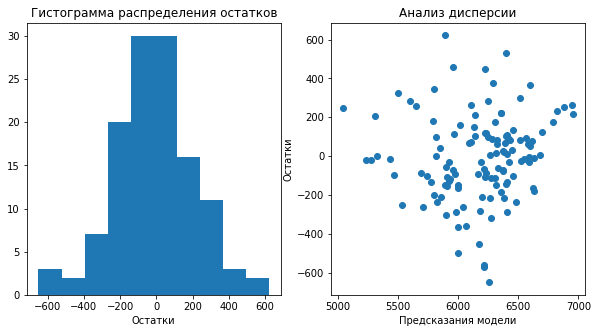

In [80]:
#Считаем остатки
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions,y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [81]:
#Оцениваем качество каждой модели по трём метрикам: MSE, MAE, RMSE.
mse = mean_squared_error(predictions,y_test)
mae = mean_absolute_error(y_test,predictions)
rmse = mean_squared_error(predictions,y_test,squared=False)
print(mse)
print(mae)
print(rmse)

48518.967977518914
170.37104711367465
220.27021582029403


### Вывод

По R2 получили 0.75. Число ближе к 1е.Модель в среднем  отклоняется от истенного значения целевого признака на ~170л.

Можно попробовать улучшить  входные признаки.

In [82]:
#преобразуйте SPR в категориальный бинарный признак, с помощю лямбда-функции
df_ferma_first['SPR'] = df_ferma_first['SPR'].apply(lambda x: 1 if x > 0.91 else 0)
df_ferma_first.sample(5)

,m_yield_kg,EFU,r_protein_g,SPR,pasture_type,papa_bull_breed,age,breed
id,,,,,,,,
224,6656,16.2,1688,1,Равнинное,Айдиал,более_2_лет,Вис Бик Айдиал
379,6609,16.4,2283,1,Холмистое,Соверин,более_2_лет,РефлешнСоверинг
386,6416,14.0,2266,1,Холмистое,Айдиал,более_2_лет,Вис Бик Айдиал
161,5766,14.1,1869,0,Равнинное,Соверин,более_2_лет,Вис Бик Айдиал
219,6456,16.5,1687,1,Равнинное,Айдиал,более_2_лет,Вис Бик Айдиал


In [83]:
df_ferma_second = df_ferma_first[['m_yield_kg','r_protein_g','SPR','pasture_type','papa_bull_breed','age','breed']].copy()
df_ferma_second['EFU_q'] = df_ferma_m[['EFU_q']].copy()
df_ferma_second

,m_yield_kg,r_protein_g,SPR,pasture_type,papa_bull_breed,age,breed,EFU_q
id,,,,,,,,
1,5863,1743,0,Равнинное,Айдиал,более_2_лет,Вис Бик Айдиал,201.64
2,5529,2138,0,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал,163.84
3,5810,1854,0,Холмистое,Соверин,более_2_лет,РефлешнСоверинг,196.00
4,5895,2012,0,Холмистое,Айдиал,более_2_лет,РефлешнСоверинг,153.76
5,5302,1675,0,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал,163.84
...,...,...,...,...,...,...,...,...
625,6812,1964,1,Равнинное,Айдиал,более_2_лет,РефлешнСоверинг,237.16
626,5513,1700,0,Равнинное,Соверин,менее_2_лет,РефлешнСоверинг,166.41
627,5970,1837,0,Холмистое,Соверин,более_2_лет,РефлешнСоверинг,207.36


In [84]:
#Cохранение выбороки для МО
X = df_ferma_second.drop('m_yield_kg',axis=1)
y = df_ferma_second['m_yield_kg']

In [85]:
print(X.head())
print()
print(y.head())

    r_protein_g  SPR pasture_type papa_bull_breed          age  \
id                                                               
1          1743    0    Равнинное          Айдиал  более_2_лет   
2          2138    0    Равнинные         Соверин  менее_2_лет   
3          1854    0    Холмистое         Соверин  более_2_лет   
4          2012    0    Холмистое          Айдиал  более_2_лет   
5          1675    0    Равнинные         Соверин  менее_2_лет   

              breed   EFU_q  
id                           
1    Вис Бик Айдиал  201.64  
2    Вис Бик Айдиал  163.84  
3   РефлешнСоверинг  196.00  
4   РефлешнСоверинг  153.76  
5    Вис Бик Айдиал  163.84  

id
1    5863
2    5529
3    5810
4    5895
5    5302
Name: m_yield_kg, dtype: int64


In [86]:
#создаём константы RANDOM_STATE
RANDOM_STATE = 42
#Разбиваем на тренировочную итестовую выборку
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split( X, y,test_size=0.2, random_state=RANDOM_STATE)

print(X_train_one.shape)
print(X_test_one.shape)
print(y_train_one.shape)
print(y_test_one.shape)

(493, 7)
(124, 7)
(493,)
(124,)


In [87]:
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(drop='first')

cat_col_one = ['SPR', 'breed', 'pasture_type', 'papa_bull_breed','age']
#Кодируем категориальные признаки тренировочной выборки
X_ohe_one = encoder.fit_transform(X_train_one[cat_col_one]).toarray()
X_test_ohe_one = encoder.transform(X_test_one[cat_col_one]).toarray()


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names_one = encoder.get_feature_names(cat_col_one)
#создаём датафрейм из закодированных данных
X_ohe_one = pd.DataFrame(X_ohe_one, columns=encoder_col_names_one)
X_test_ohe_one = pd.DataFrame(X_test_ohe_one, columns=encoder_col_names_one)



In [88]:
#Маштабируем количественные признаки
scaler = StandardScaler()

df_num_one = ['EFU_q','r_protein_g']
# обучаем скейлер на количественных признаках 
scaler.fit(X_train_one[df_num_one])
# масштабируем тренировочную выборку
X_scaler_one =  scaler.transform(X_train_one[df_num_one])
X_test_scaler_one= scaler.transform(X_test_one[df_num_one])

X_scaled_one = pd.DataFrame(X_scaler_one, columns=df_num_one)
X_test_scaled_one = pd.DataFrame(X_test_scaler_one, columns=df_num_one)

print(X_test_scaled_one)
X_scaled_one.shape

        EFU_q  r_protein_g
0    0.076687    -0.307204
1    1.735869     2.144156
2    1.046833    -0.943145
3    0.391614     1.529957
4    0.963081    -1.133383
..        ...          ...
119 -1.028994    -0.714858
120  0.233094    -0.986628
121 -0.379852    -0.671375
122 -0.454093     1.437556
123  0.963081    -0.492007

[124 rows x 2 columns]


(493, 2)

In [89]:
X_train_one = pd.concat([X_ohe_one, X_scaled_one], axis=1)
X_test_one = pd.concat([X_test_ohe_one, X_test_scaled_one], axis=1)

In [90]:
#Создайте модель линейной регрессии
#инициализация модели
model_lr  = LinearRegression()
#обучение модели на тренировочных данных
model_lr.fit(X_train_one, y_train_one)
#вывод рассчитанных коэффициентов
print(model_lr.coef_,model_lr.intercept_ )

#Получаем предсказания
predictions_one = model_lr.predict(X_test_one)
r2_lr_one = r2_score(y_test_one,predictions_one)
print(r2_lr_one)

[ 381.52094871    7.67301734  -67.05470354   33.13335719 -115.75179756
 -241.62759513 -224.94963117  154.97893028   43.3499339 ] 6055.101134144135
0.839222264765832


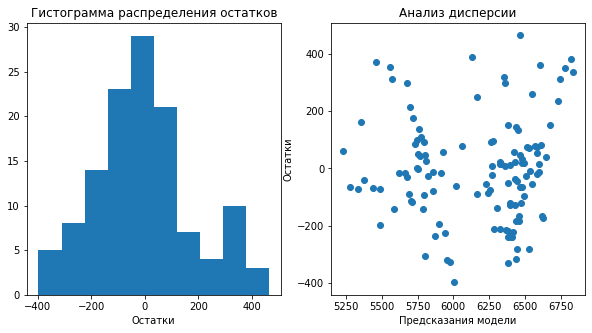

In [91]:
#Считаем остатки
residuals_one = y_test_one - predictions_one
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_one)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_one,y=residuals_one)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [92]:
#Оцениваем качество каждой модели по трём метрикам: MSE, MAE, RMSE.
mse_one = mean_squared_error(predictions_one,y_test_one)
mae_one = mean_absolute_error(y_test_one,predictions_one)
rmse_one = mean_squared_error(predictions_one,y_test_one,squared=False)
print(mse_one)
print(mae_one)
print(rmse_one)

31712.7454222997
137.4878111110182
178.0807272623843


### Вывод

Результат R2 стал 0.83, после категоризации СПО и вазвышение ЭКЕ в квадрат результат улучшилось.Модель в среднем отклоняется от истенного значения целевого признака на ~137л. Попробуем улучшить модель.

In [93]:
#Добавляем Имя папы в  входные признаки
df_ferma_third = df_ferma_second[['m_yield_kg','EFU_q','r_protein_g','SPR','pasture_type'
                           ,'papa_bull_breed','age','breed']].copy()
df_ferma_third['dad_name'] = df_ferma_m[['dad_name']].copy()
df_ferma_third

,m_yield_kg,EFU_q,r_protein_g,SPR,pasture_type,papa_bull_breed,age,breed,dad_name
id,,,,,,,,,
1,5863,201.64,1743,0,Равнинное,Айдиал,более_2_лет,Вис Бик Айдиал,Буйный
2,5529,163.84,2138,0,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал,Соловчик
3,5810,196.00,1854,0,Холмистое,Соверин,более_2_лет,РефлешнСоверинг,Барин
4,5895,153.76,2012,0,Холмистое,Айдиал,более_2_лет,РефлешнСоверинг,Буйный
5,5302,163.84,1675,0,Равнинные,Соверин,менее_2_лет,Вис Бик Айдиал,Барин
...,...,...,...,...,...,...,...,...,...
625,6812,237.16,1964,1,Равнинное,Айдиал,более_2_лет,РефлешнСоверинг,Буйный
626,5513,166.41,1700,0,Равнинное,Соверин,менее_2_лет,РефлешнСоверинг,Барин
627,5970,207.36,1837,0,Холмистое,Соверин,более_2_лет,РефлешнСоверинг,Барин


In [94]:
#Cохранение выбороки для МО
X = df_ferma_third.drop('m_yield_kg',axis=1)
y = df_ferma_third['m_yield_kg']

In [95]:
print(X.head())
print()
print(y.head())

     EFU_q  r_protein_g  SPR pasture_type papa_bull_breed          age  \
id                                                                       
1   201.64         1743    0    Равнинное          Айдиал  более_2_лет   
2   163.84         2138    0    Равнинные         Соверин  менее_2_лет   
3   196.00         1854    0    Холмистое         Соверин  более_2_лет   
4   153.76         2012    0    Холмистое          Айдиал  более_2_лет   
5   163.84         1675    0    Равнинные         Соверин  менее_2_лет   

              breed  dad_name  
id                             
1    Вис Бик Айдиал    Буйный  
2    Вис Бик Айдиал  Соловчик  
3   РефлешнСоверинг     Барин  
4   РефлешнСоверинг    Буйный  
5    Вис Бик Айдиал     Барин  

id
1    5863
2    5529
3    5810
4    5895
5    5302
Name: m_yield_kg, dtype: int64


In [96]:
#создаём константы RANDOM_STATE
RANDOM_STATE = 42
#Разбиваем на тренировочную итестовую выборку
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split( X, y,test_size=0.2, random_state=RANDOM_STATE)

print(X_train_two.shape)
print(X_test_two.shape)
print(y_train_two.shape)
print(y_test_two.shape)

(493, 8)
(124, 8)
(493,)
(124,)


In [97]:
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(drop='if_binary',sparse=False)

cat_col_two = ['SPR', 'breed', 'pasture_type', 'papa_bull_breed','age','dad_name']
#Кодируем категориальные признаки тренировочной выборки
X_ohe_two = encoder.fit_transform(X_train_two[cat_col_two])#.toarray()
X_test_ohe_two = encoder.transform(X_test_two[cat_col_two])#.toarray()


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names_two = encoder.get_feature_names(cat_col_two)
#создаём датафрейм из закодированных данных
X_ohe_two = pd.DataFrame(X_ohe_two, columns=encoder_col_names_two)
X_test_ohe_two = pd.DataFrame(X_test_ohe_two, columns=encoder_col_names_two)


In [98]:
#Маштабируем количественные признаки
scaler = StandardScaler()

df_num_two = ['EFU_q','r_protein_g']
# обучаем скейлер на количественных признаках 
scaler.fit(X_train_two[df_num_two])
# масштабируем тренировочную выборку
X_scaler_two =  scaler.transform(X_train_two[df_num_two])
X_test_scaler_two= scaler.transform(X_test_two[df_num_two])

X_scaled_two = pd.DataFrame(X_scaler_two, columns=df_num_two)
X_test_scaled_two = pd.DataFrame(X_test_scaler_two, columns=df_num_two)

print(X_scaled_two)

        EFU_q  r_protein_g
0    0.552249     0.274382
1   -0.817369     0.339607
2   -1.098479    -1.106206
3    0.471667     1.616923
4    1.473518    -0.285463
..        ...          ...
488 -1.235864    -0.649634
489 -0.527805    -0.627892
490  0.879858     1.616923
491  0.391614    -0.019129
492  0.714996     0.187416

[493 rows x 2 columns]


In [99]:
X_train_two = pd.concat([X_ohe_two, X_scaled_two], axis=1)
X_test_two = pd.concat([X_test_ohe_two, X_test_scaled_two], axis=1)

In [100]:
#Создайте модель линейной регрессии
#инициализация модели
model_lr  = LinearRegression()
#обучение модели на тренировочных данных
model_lr.fit(X_train_two, y_train_two)
#вывод рассчитанных коэффициентов
print(model_lr.coef_,model_lr.intercept_ )

#Получаем предсказания
predictions_two = model_lr.predict(X_test_two)
r2_lr_two = r2_score(y_test_two,predictions_two)
print(r2_lr_two)

[ 371.21815078   25.43482849   16.3655853   -71.8362581    55.47067279
  -26.21914549   10.65298839   15.5661571  -220.66970415 -159.57466727
  131.51640818  160.7793523  -132.72109321  148.83960756   45.19640233] 5925.212281238297
0.8442655765704027


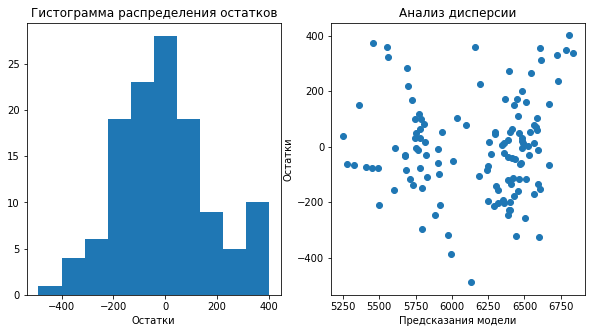

In [101]:
#Считаем остатки
residuals_two = y_test_two - predictions_two
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_two)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_two,y=residuals_two)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [102]:
#Оцениваем качество каждой модели по трём метрикам: MSE, MAE, RMSE.
mse_two = mean_squared_error(predictions_two,y_test_two)
mae_two = mean_absolute_error(y_test_two,predictions_two)
rmse_two = mean_squared_error(predictions_two,y_test_two,squared=False)
print(mse_two)
print(mae_two)
print(rmse_two)

30717.972961357355
136.5125310005175
175.26543572923143


In [103]:
#Находим доверительный нтервал 
mean = np.mean(y_test_two)
std = np.std(y_test_two)
 
interval = stats.t.interval(0.95, len(y_test_two)-1, loc=mean, scale=std/np.sqrt(len(y_test_two)))
 
interval

(6083.891792046576, 6241.785627308263)

In [104]:
X_train_two

,SPR_1,breed_РефлешнСоверинг,pasture_type_Равнинное,pasture_type_Равнинные,pasture_type_Холмистое,papa_bull_breed_Айдиал,papa_bull_breed_Айдиалл,papa_bull_breed_Соверин,age_менее_2_лет,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,EFU_q,r_protein_g
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.552249,0.274382
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.817369,0.339607
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.098479,-1.106206
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.471667,1.616923
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.473518,-0.285463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.235864,-0.649634
489,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.527805,-0.627892
490,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.879858,1.616923
491,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.391614,-0.019129



### Вывод 

Результат R2 в этом случае,после добавлении признака Имя Папы стал 0.84.Модель в среднем отклоняется от истенного значения целевого признака на ~136л.


Из трёх моделей самая удачная,последняя модель. У этой модели  МАЕ-136, самая маленькая разница между MAE и MSE у последней модели, сооттветсвено разница между фактическим значением и предсказанием тоже поменьше,чем у остальных моделей.Доверительный интервал у лучшей модели 6083.89-6241.78. По остаткам-разброс ошибок модели в рамках нормы, а сами ошибки в рамках допустимого диапазона. Такую модель можно использовать, хотя есть потенциал к улучшению.

In [105]:
df_cow_buy['EFU'] = df_ferma_m['EFU'].mean() *1.05
df_cow_buy['SPR'] = df_ferma_m['SPR'].mean() *1.05
df_cow_buy['r_protein_g'] = df_ferma_m['r_protein_g'].mean() *1.05
df_cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age,EFU,SPR,r_protein_g
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,0.959431,2021.113857
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.293582,0.959431,2021.113857
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,0.959431,2021.113857
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.293582,0.959431,2021.113857
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.293582,0.959431,2021.113857
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.293582,0.959431,2021.113857
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,0.959431,2021.113857
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.293582,0.959431,2021.113857
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,0.959431,2021.113857
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.293582,0.959431,2021.113857


In [106]:
#Создаём датафрейм для входных признаков
df_cow_buy.shape

(20, 10)

In [107]:
#преобразуйте SPR в категориальный бинарный признак, с помощю лямбда-функции
df_cow_buy['SPR'] = df_cow_buy['SPR'].apply(lambda x: 1 if x > 0.91 else 0)
#Вазвысим ЭКЕ в квадрат
df_cow_buy['EFU_q'] = df_cow_buy['EFU']**2
df_cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age,EFU,SPR,r_protein_g,EFU_q
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.293582,1,2021.113857,233.893646
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.293582,1,2021.113857,233.893646
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.293582,1,2021.113857,233.893646
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.293582,1,2021.113857,233.893646
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.293582,1,2021.113857,233.893646


In [108]:
#Добовляем входные признаки
X_buy_cow =  df_cow_buy[['breed','pasture_type','papa_bull_breed','dad_name','age','SPR','r_protein_g','EFU_q']].copy()
X_buy_cow

,breed,pasture_type,papa_bull_breed,dad_name,age,SPR,r_protein_g,EFU_q
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,1,2021.113857,233.893646
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,1,2021.113857,233.893646
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,1,2021.113857,233.893646
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,1,2021.113857,233.893646
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,1,2021.113857,233.893646
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,1,2021.113857,233.893646
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,1,2021.113857,233.893646
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,1,2021.113857,233.893646
8,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,1,2021.113857,233.893646
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,1,2021.113857,233.893646


In [109]:
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(handle_unknown="ignore",sparse=False)

cat_col_cow = ['SPR', 'breed', 'pasture_type', 'papa_bull_breed','age','dad_name']
#Кодируем категориальные признаки 
X_test_ohe_cow = encoder.fit(X_buy_cow[cat_col_cow])
X_test_ohe_cow = encoder.transform(X_buy_cow[cat_col_cow])


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names_cow = encoder.get_feature_names(cat_col_cow)

ohe_X_test_cow = pd.DataFrame(X_test_ohe_cow, columns=encoder_col_names_cow)

#Маштабируем количественные признаки
scaler = StandardScaler()

df_num_cow = ['EFU_q','r_protein_g']

# обучаем скейлер на количественных признаках 
# масштабируем  выборку
scaler.fit(X_buy_cow[df_num_cow])
scaler_X_test_cow = scaler.transform(X_buy_cow[df_num_cow])


scaler_X_test_cow = pd.DataFrame(scaler_X_test_cow, columns=df_num_cow)



In [110]:
X_test_cow = pd.concat([ohe_X_test_cow, scaler_X_test_cow], axis=1)
print(X_train_two.shape)
print(X_test_cow.shape)

(493, 15)
(20, 15)


In [111]:
X_test_cow

,SPR_1,breed_Вис Бик Айдиал,breed_РефлешнСоверинг,pasture_type_равнинное,pasture_type_холмистое,papa_bull_breed_Айдиал,papa_bull_breed_Соверин,age_более_2_лет,age_менее_2_лет,dad_name_Барин,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,EFU_q,r_protein_g
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0
5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0
6,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0
7,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0
8,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0
9,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0


In [112]:
#Выводим предсказания 
predictions_new = model_lr.predict(X_test_cow)
predictions_new

array([6333.42628732, 5977.49268493, 5913.56822756, 6295.09410001,
       6167.78716912, 5997.68638587, 6333.42628732, 6213.72854618,
       5913.56822756, 6058.85823876, 6076.79797569, 6233.92224712,
       6333.42628732, 5813.70854038, 5913.56822756, 6295.09410001,
       6076.79797569, 5997.68638587, 6213.72854618, 6167.78716912])

## Обучение модели логистической регрессии

In [113]:
#Создаём датафрейм для лог.регрессии
df_ferma_md = df_ferma_m[['r_protein_g','EFU','SPR','milk_test','age','fat_content','protein']].copy() 
df_ferma_md

,r_protein_g,EFU,SPR,milk_test,age,fat_content,protein
id,,,,,,,
1,1743,14.2,0.890,вкусно,более_2_лет,3.58,3.076
2,2138,12.8,0.890,вкусно,менее_2_лет,3.54,3.079
3,1854,14.0,0.885,не вкусно,более_2_лет,3.59,3.074
4,2012,12.4,0.885,не вкусно,более_2_лет,3.40,3.075
5,1675,12.8,0.885,вкусно,менее_2_лет,3.73,3.073
...,...,...,...,...,...,...,...
625,1964,15.4,0.940,не вкусно,более_2_лет,3.74,3.075
626,1700,12.9,0.880,вкусно,менее_2_лет,3.64,3.073
627,1837,14.4,0.880,не вкусно,более_2_лет,3.64,3.075


In [114]:
df_ferma_md.phik_matrix(verbose=False) 

,r_protein_g,EFU,SPR,milk_test,age,fat_content,protein
r_protein_g,1.000000,0.450278,0.384237,0.165221,0.346741,0.425181,0.213948
EFU,0.450278,1.000000,0.589310,0.274166,0.767431,0.722649,0.000000
SPR,0.384237,0.589310,1.000000,0.573005,0.738159,0.623847,0.000000
milk_test,0.165221,0.274166,0.573005,1.000000,0.141381,0.203021,0.105665
age,0.346741,0.767431,0.738159,0.141381,1.000000,0.678349,0.000000
fat_content,0.425181,0.722649,0.623847,0.203021,0.678349,1.000000,0.000000
protein,0.213948,0.000000,0.000000,0.105665,0.000000,0.000000,1.000000


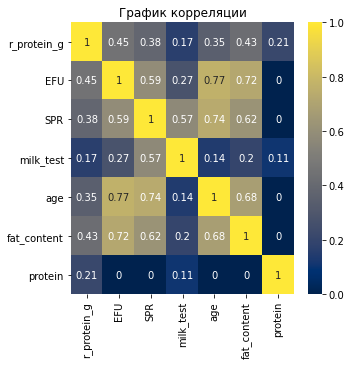

In [115]:
#Получаем кор.график по прзнакам
plt.figure(figsize=(5,5))
sns.heatmap(df_ferma_md.phik_matrix(verbose=False), annot=True, cmap='cividis')
plt.title('График корреляции');

###  Вывод

Оставим как входные признаки 'EFU','r_protein_g','SPR','fat_content','age','protein'.

In [116]:
df_ferma_md['milk_test']

id
1         вкусно
2         вкусно
3      не вкусно
4      не вкусно
5         вкусно
         ...    
625    не вкусно
626       вкусно
627    не вкусно
628       вкусно
629       вкусно
Name: milk_test, Length: 617, dtype: object

In [117]:
df_ferma_md['milk_test'] = df_ferma_md['milk_test'].apply(lambda x: 1 if x == 'вкусно' else 0)
df_ferma_md['milk_test']

id
1      1
2      1
3      0
4      0
5      1
      ..
625    0
626    1
627    0
628    1
629    1
Name: milk_test, Length: 617, dtype: int64

In [118]:
#Разделяем датафрейм для обучении модели
X_mt = df_ferma_md.drop('milk_test',axis=1)
y_mt = df_ferma_md['milk_test']
print(X_mt.shape)
print(y_mt.shape)

(617, 6)
(617,)


In [119]:
#создаём константы RANDOM_STATE
RANDOM_STATE = 42
#Разбиваем на тренировочную итестовую выборку
X_train_mt, X_test_mt, y_train_mt, y_test_mt = train_test_split( X_mt, y_mt,test_size=0.2, random_state=RANDOM_STATE)

print(X_train_mt.shape)
print(X_test_mt.shape)
print(y_train_mt.shape)
print(y_test_mt.shape)

(493, 6)
(124, 6)
(493,)
(124,)


In [120]:
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(handle_unknown="ignore",sparse=False)

cat_mt = ['age']
#Кодируем категориальные признаки тренировочной выборки
X_train_mt_ohe = encoder.fit_transform(X_train_mt[cat_mt])#.toarray()
X_test_mt_ohe = encoder.transform(X_test_mt[cat_mt])#.toarray()


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names_mt = encoder.get_feature_names()
#создаём датафрейм из закодированных данных
X_train_ohe_mt = pd.DataFrame(X_train_mt_ohe, columns=encoder_col_names_mt)
X_test_ohe_mt = pd.DataFrame(X_test_mt_ohe, columns=encoder_col_names_mt)

#Маштабируем количественные признаки
scaler = StandardScaler()

df_num_mt = ['EFU','r_protein_g','SPR','fat_content','protein'] #,'protein'
# обучаем скейлер на количественных признаках 
scaler.fit(X_train_mt[df_num_mt])
# масштабируем тренировочную выборку
X_scaler_mt =  scaler.transform(X_train_mt[df_num_mt])
X_test_scaler_mt= scaler.transform(X_test_mt[df_num_mt])

X_train_scaled_mt = pd.DataFrame(X_scaler_mt, columns=df_num_mt)
X_test_mt_scaled = pd.DataFrame(X_test_scaler_mt, columns=df_num_mt)

X_train_mt = pd.concat([X_train_ohe_mt, X_train_scaled_mt], axis=1)#X_train_ohe_mt,
X_test_mt = pd.concat([X_test_ohe_mt, X_test_mt_scaled], axis=1)#X_test_ohe_mt,

print(X_train_mt.shape)
print(X_test_mt.shape)

(493, 7)
(124, 7)


In [121]:
# создаём объект для работы с моделью
clf = LogisticRegression(random_state=RANDOM_STATE)

# обучаем модель на данных
clf = clf.fit(X_train_mt,y_train_mt)
prediction = clf.predict(X_test_mt)


In [122]:
#Получаем результат метрик
acc = accuracy_score(y_test_mt,prediction)
recall = recall_score(y_test_mt,prediction, average="binary",pos_label=1)
precision = precision_score(y_test_mt,prediction,pos_label=1)
print(acc)
print(recall)
print(precision)

0.6935483870967742
0.935064935064935
0.6857142857142857


In [123]:
#Выводим коефиценты признаков
for feature_number, feature_name in enumerate(X_train_mt.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_более_2_лет      : +0.050766
x0_менее_2_лет      : -0.050662
EFU                 : +0.324590
r_protein_g         : +0.112966
SPR                 : +0.165176
fat_content         : -0.207448
protein             : +0.162668


[[14 33]
 [ 5 72]]


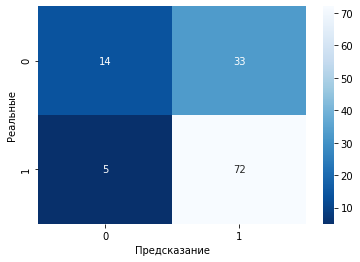

In [124]:
#Получаем матрицы ошибок  и строим тепловую карту
cm = confusion_matrix(y_test_mt,prediction)
print(cm)
cm = confusion_matrix(y_test_mt, prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные')
plt.xlabel('Предсказание');

###  Вывод

 Критичнее всего при покупке коров обратить внимание на ошибок первого рода(precision).
 
 Precision - 0.66, recall - 0.88. В этом случае recall больше чем precision. Но ошибок первого рода больше, важно уменьшить ошибки первого род, По скольку TP тоже больше чем TN, если не исправит это то получится, больше получается  вкусное молоко, и предсказание будет ложным.

In [125]:
clf = clf.fit(X_train_mt, y_train_mt)
y_pred = clf.predict(X_test_mt)
pd.DataFrame(zip(y_test_mt, y_pred), columns = ['y_test','y_pred']).head() 

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


In [126]:
y_proba = clf.predict_proba(X_test_mt)[:,1]

data = pd.DataFrame(zip(y_test_mt, y_proba,y_pred),
             columns = ['y_valid', 'y_proba','y_pred'])#.sort_values(by='y_proba',ascending=False)

data.head() 


,y_valid,y_proba,y_pred
0,0,0.533100,1
1,1,0.744684,1
2,1,0.676855,1
3,1,0.644701,1
4,1,0.651864,1


In [127]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
columns = []


for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i else 0)

data.sample(5)

,y_valid,y_proba,y_pred,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
110,0,0.639211,1,1,1,1,1,1,1,0,0,0,0
64,0,0.627560,1,1,1,1,1,1,1,0,0,0,0
80,1,0.613072,1,1,1,1,1,1,1,0,0,0,0
88,1,0.530101,1,1,1,1,1,1,0,0,0,0,0
28,1,0.437837,0,1,1,1,1,0,0,0,0,0,0


In [128]:
acc = accuracy_score(y_test_mt,data['y_pred_0.55'])
recall = recall_score(y_test_mt,data['y_pred_0.55'], average="binary",pos_label=1)
precision = precision_score(y_test_mt,data['y_pred_0.55'],pos_label=1)
print(acc)
print(recall)
print(precision)

0.6370967741935484
0.7272727272727273
0.7


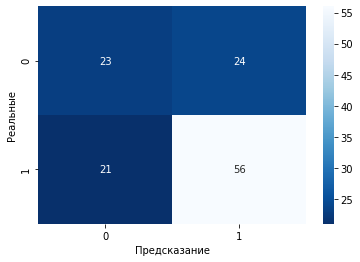

In [129]:
cm = confusion_matrix(y_test_mt, data['y_pred_0.55'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные')
plt.xlabel('Предсказание');

In [130]:
acc = accuracy_score(y_test_mt,data['y_pred_0.64'])
recall = recall_score(y_test_mt,data['y_pred_0.64'], average="binary",pos_label=1)
precision = precision_score(y_test_mt,data['y_pred_0.64'],pos_label=1)
print(acc)
print(recall)
print(precision)

0.6129032258064516
0.4675324675324675
0.8372093023255814


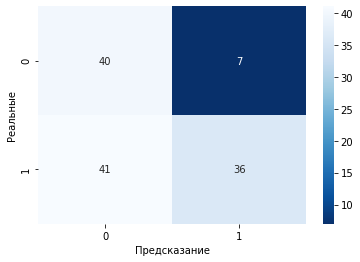

In [131]:
cm = confusion_matrix(y_test_mt, data['y_pred_0.64'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные')
plt.xlabel('Предсказание');

In [132]:
acc = accuracy_score(y_test_mt,data['y_pred_0.73'])
recall = recall_score(y_test_mt,data['y_pred_0.73'], average="binary",pos_label=1)
precision = precision_score(y_test_mt,data['y_pred_0.73'],pos_label=1)
print(acc)
print(recall)
print(precision)

0.4596774193548387
0.12987012987012986
1.0


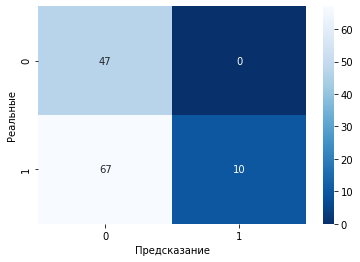

In [133]:
cm = confusion_matrix(y_test_mt, data['y_pred_0.73'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные')
plt.xlabel('Предсказание');



### Вывод

Что бы снизить FP и повысить значение precision выбрала порог 0.73. До этого precision был- 0.68, после выбранного порога стало - 1. Значение FP стало 0. Recall стал меньше был - 0.88, стал - 0.12, соответсвенно FN стал по больше. Изначально accuracy_score был 0.69, то есть модель ошибался на 31%. После выбора порога стало 0.41. Канечно результат не такой уж хороший. Во время выбора признаков попробовала поменять признаки, Но всё равно получить accuracy_score больше 0.69 не получается. В таких случаях нужно найти больше данных и попробоавть добавить как признаки и обучать по этим данным. Попробовала добавить породу по скольку вкус молока зависит от кормления, содержания, возраста, климата и породы, но результат не менялся.

In [134]:
df_cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age,EFU,SPR,r_protein_g,EFU_q
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.293582,1,2021.113857,233.893646
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.293582,1,2021.113857,233.893646
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.293582,1,2021.113857,233.893646
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.293582,1,2021.113857,233.893646
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.293582,1,2021.113857,233.893646


In [135]:
#Создаём датафрейм для входных признаков
X_c =  df_cow_buy[['current_fat_content','current_level_protein','age','EFU','SPR','r_protein_g']].copy()# 'breed','pasture_type','papa_bull_breed','dad_name'
X_c.shape

(20, 6)

In [136]:
#Создаём датафрейм для входных признаков
X_c =  df_cow_buy
#Кодируем с помощю OneCodeEncoder
encoder = OneHotEncoder(handle_unknown="ignore",sparse=False)

cat_mt = ['age','SPR']#'dad_name'
#Кодируем категориальные признаки тренировочной выборки
X_train_c = encoder.fit_transform(X_c[cat_mt])#.toarray()


#сохраните в переменной encoder_col_names названия новых столбцов 
encoder_col_names_mt = encoder.get_feature_names()
#создаём датафрейм из закодированных данных
X_train_cb = pd.DataFrame(X_train_c, columns=encoder_col_names_mt)

#Маштабируем количественные признаки
scaler = StandardScaler()

df_num_cb = ['current_fat_content','current_level_protein','EFU','r_protein_g'] #,'protein'
# обучаем скейлер на количественных признаках 
scaler.fit(X_c[df_num_cb])
# масштабируем тренировочную выборку
X_scaler_sb =  scaler.transform(X_c[df_num_cb])

X_train_scaled_cb = pd.DataFrame(X_scaler_sb, columns=df_num_cb)


X_c = pd.concat([X_train_cb, X_train_scaled_cb], axis=1)#X_train_ohe_mt,

print(X_c.shape)
print(X_test_mt.shape)

(20, 7)
(124, 7)


In [137]:
#Получаем предсказания
prediction_milk = clf.predict_proba(X_c)[:,1] > 0.73
prediction_milk 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [138]:
df_cow_buy['milk_test'] = prediction_milk
df_cow_buy['m_yield_kg'] = predictions_new
df_cow_buy['m_yield_kg'] = df_cow_buy['m_yield_kg'].astype('int')
df_cow_buy

,breed,pasture_type,papa_bull_breed,dad_name,current_fat_content,current_level_protein,age,EFU,SPR,r_protein_g,EFU_q,milk_test,m_yield_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646,False,6333
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.293582,1,2021.113857,233.893646,False,5977
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646,False,5913
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.293582,1,2021.113857,233.893646,False,6295
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.293582,1,2021.113857,233.893646,False,6167
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.293582,1,2021.113857,233.893646,False,5997
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.293582,1,2021.113857,233.893646,False,6333
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.293582,1,2021.113857,233.893646,False,6213
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.293582,1,2021.113857,233.893646,False,5913
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.293582,1,2021.113857,233.893646,False,6058


In [139]:
best_cows = df_cow_buy.loc[16]
best_cows

breed                    Вис Бик Айдиал
pasture_type                  холмистое
papa_bull_breed                 Соверин
dad_name                       Соловчик
current_fat_content                3.73
current_level_protein             3.079
age                         более_2_лет
EFU                           15.293582
SPR                                   1
r_protein_g                 2021.113857
EFU_q                        233.893646
milk_test                          True
m_yield_kg                         6076
Name: 16, dtype: object

## Итоговые выводы

### Вывод 

По этим данным фермер может купить одну корову, каторый подходит по критериям - вкусное молоко и удой 6000кг/год.

Порода - Вис Бик Айдиал

тип пастбища - холмистое

порода папы_быка - Соверин

текущая_жирность,% - 3.73

текущий_уровень_белок,% - 3.079

возраст - более_2_лет

ЭКЕ (Энергетическая кормовая единица) - 233

СПО (Сахаро-протеиновое соотношение) - 0.95

сырой протеин, г - 2021.

В данных так же есть идентичное случая корова который подходит по критериям разница в текущой жирности и
текущей уровней белка. Скорее всего, если добавить в корм  больше ЭКЕ,СПО и сырой протеин у  коров по полученным критериям вкус молока улучшится.

### Вывод о моделях

Во время линейной регрессии, что бы улучшить предсказания по удою коров,нашла порог СПО и поменяла на бинареый тип данных. Что бы лучше понять линейную связь между ЭКЕ и удойом, возвысили в квадрат.И добавили имя папы во входяшие признаки.


Из трёх моделей самая удачная,последняя модель. У этой модели  МАЕ-137, самая маленькая разница между MAE и MSE у последней модели, сооттветсвено разница между фактическим значением и предсказанием тоже поменьше,чем у остальных моделей.Доверительный интервал у лучшей модели 6083.89-6241.78. По остаткам-разброс ошибок модели в рамках нормы, а сами ошибки в рамках допустимого диапазона. Такую модель можно использовать, хотя есть потенциал к улучшению.

Можно улучшить данные нацти похожие данные из других источников и после предоброботки добавить эти данные, как входные признаки.

Что бы предсказание было более точным, во время лин.регрессии важно использовать метрики MSE,RMSE,MAE. Для лог.регрессии-Confusion Matrix,Accuracy,Recall,Precision.